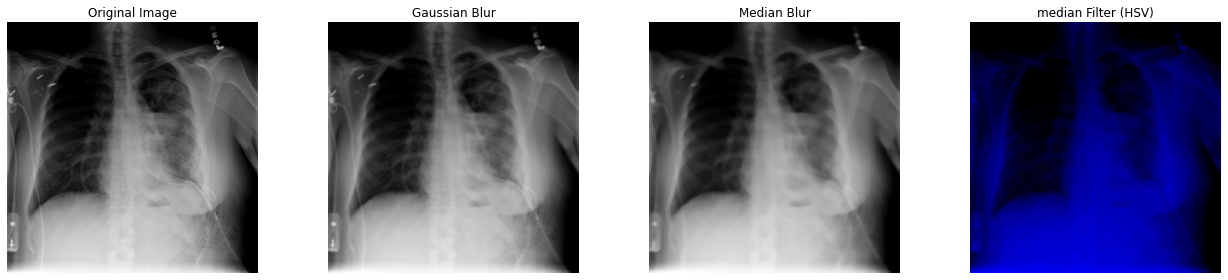

In [17]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image
image_path = "Lung_Opacity-1.png.JPG"  # Replace with the path to your image
original_image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# Apply Gaussian Blur
gaussian_blur = cv2.GaussianBlur(original_image, (3, 3), 0)

# Apply Median Blur
median_blur = cv2.medianBlur(gaussian_blur, 5)

# Apply Sobel Filter
sobel_filtered = cv2.Sobel(median_blur, cv2.CV_64F, 1, 1, ksize=21)

# Convert Sobel-filtered image to 8-bit format
#sobel_filtered_8u = cv2.convertScaleAbs(sobel_filtered)

# Convert Sobel-filtered 8-bit image to HSV
median_colored = cv2.cvtColor(cv2.cvtColor(median_blur , cv2.COLOR_GRAY2BGR), cv2.COLOR_BGR2HSV)

# Display the original image and processed images
plt.figure(figsize=(18, 4))

plt.subplot(1, 4, 1)
plt.imshow(original_image, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 4, 2)
plt.imshow(gaussian_blur, cmap='gray')
plt.title('Gaussian Blur')
plt.axis('off')

plt.subplot(1, 4, 3)
plt.imshow(median_blur, cmap='gray')
plt.title('Median Blur')
plt.axis('off')

plt.subplot(1, 4, 4)
plt.imshow(median_colored)
plt.title('median Filter (HSV)')
plt.axis('off')

plt.tight_layout()
plt.show()



In [4]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

# Function to apply filters and save the processed image
def process_and_save_image(input_path, output_path):
    # Load the image
    original_image = cv2.imread(input_path, cv2.IMREAD_GRAYSCALE)

    # Apply Gaussian Blur
    gaussian_blur = cv2.GaussianBlur(original_image, (3, 3), 0)

    # Apply Median Blur
    median_blur = cv2.medianBlur(gaussian_blur, 5)

    # Convert to HSV
    median_colored = cv2.cvtColor(cv2.cvtColor(median_blur, cv2.COLOR_GRAY2BGR), cv2.COLOR_BGR2HSV)

    # Save the processed image
    cv2.imwrite(output_path, median_colored)

# Define paths
input_dataset_path = "dataset"  # Replace with the path to your original dataset
output_dataset_path = "dataset2"  # Replace with the path where you want to save the processed images

# Define class names
class_names = ["Bacterial_Pnemonia", "Normal", "Viral _Pneumonia"]

# Create output dataset folders
for class_name in class_names:
    os.makedirs(os.path.join(output_dataset_path, class_name), exist_ok=True)

# Iterate through each image in the original dataset
for class_name in class_names:
    class_path = os.path.join(input_dataset_path, class_name)
    output_class_path = os.path.join(output_dataset_path, class_name)

    # Use tqdm for progress visualization
    for filename in tqdm(os.listdir(class_path), desc=f"Processing {class_name}"):
        if filename.endswith(".png") or filename.endswith(".jpg"):
            input_image_path = os.path.join(class_path, filename)
            output_image_path = os.path.join(output_class_path, filename)

            # Apply filters and save the processed image
            process_and_save_image(input_image_path, output_image_path)

print("Processing complete. Images saved in dataset2.")


Processing Viral _Pneumonia: 100%|█████████████████████████████████████████████████████████████████████████████████████| 3054/3054 [00:58<00:00, 52.63it/s]

Processing complete. Images saved in dataset2.
